## 需要调用的函数

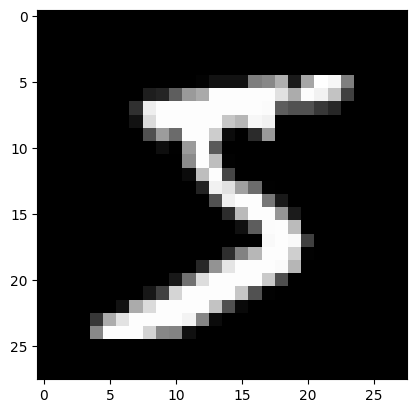

len is 70000 spilt is 56000


In [1]:
import matplotlib.pyplot as plt  # 导入绘图库 matplotlib
import numpy as np  # 导入数值计算库 numpy
import os  # 导入操作系统库

m_x = np.loadtxt('mnist_x', delimiter=' ')  # 从文件加载数据集 mnist_x，存储为二维数组 m_x
m_y = np.loadtxt('mnist_y')  # 从文件加载数据集 mnist_y，存储为一维数组 m_y

data = np.reshape(m_x[0], (28, 28)).astype(int)  # 将 m_x 的第一个样本重新调整形状为 28x28 的二维数组，并转换为整数类型
plt.figure()  # 创建新的绘图窗口
plt.imshow(data, cmap='gray')  # 在绘图窗口中显示灰度图像
plt.show()  # 添加此行以显示图像


# 归一化处理，再减去均值
m_x = m_x/255 - np.mean(m_x)

ratio = 0.8  # 划分训练集和测试集的比例
split = int(len(m_x) * ratio)  # 计算用于训练集的样本数量
print("len is", len(m_x), "spilt is", split)
np.random.seed(0)  # 设置随机数种子
idx = np.random.permutation(np.arange(len(m_x)))  # 随机排列样本索引
m_x = m_x[idx]  # 根据随机索引重新排序 m_x
m_y = m_y[idx]  # 根据随机索引重新排序 m_y

x_train, x_test = m_x[:split], m_x[split:]  # 将数据集划分为训练集和测试集
y_train, y_test = m_y[:split], m_y[split:]  # 将标签划分为训练集和测试集


def distance(a, b):
    # dis = np.sqrt(np.sum(np.square(a - b))
    # print ("distance a shape ", np.shape(a)) #
    # print ("distance b shape ", np.shape(b)) #
    
    dis = np.linalg.norm(a - b)
        
    # print ("dis shape ", np.shape(dis))
    return  dis  # 计算两个向量之间的欧氏距离


class KNN:
    def __init__(self, k, label_num):
        self.k = k  # KNN 中的 k 值，即最近邻的个数
        self.label_num = label_num  # 标签的数量
        self.x_train = None
        self.y_train = None

    def fit(self, x_train, y_train):
        self.x_train = x_train  # 训练集的特征数据
        self.y_train = y_train  # 训练集的标签数据

    def get_knn_indices(self, x):
        # dis = list(map(lambda a, b: distance(a, b), self.x_train, x))  # 计算测试样本与训练样本的距离
        
        # print ("get_knn_indices x shape ", np.shape(x)) # x shape (784,)
        # print ("get_knn_indices self.x_train shape ", np.shape(self.x_train)) # self.x_train shape  (69997, 784)
        
        # dis = list(map(distance, self.x_train, x)) #### 这里发现问题，dis shape输出的也是(784,)，应该是(69997, 1)
        dis = []
        for sample in self.x_train:
            d = distance(sample, x)
            dis.append(d)
        
        # print ("Another dis shape ", np.shape(dis)) # #### 这里发现问题，输出的也是(784,)，应该是(69997, 1)
        
        # print ("Min dis is ", np.min(dis), "Index is", np.argmin(dis))
        
        knn_indices = np.argsort(dis)  # 根据距离排序，获取最近邻的索引
        knn_indices = knn_indices[:self.k]  # 取最近的 k 个邻居的索引        
        
        # print (dis)
        # print ("最近的 k 个邻居的索引是训练集的哪个 knn indices ", knn_indices)
        
        return knn_indices

    def get_label(self, x):
        knn_indices = self.get_knn_indices(x)  # 获取最近邻的索引
        label_statistic = np.zeros(shape=[self.label_num])  # 初始化标签统计数组
        for index in knn_indices:
            label = int(self.y_train[index])  # 获取最近邻对应的标签
            label_statistic[label] += 1  # 统计每个标签出现的次数
        
        # print("标签投票数量 label_statistic is ", label_statistic)     
        
        return np.argmax(label_statistic)  # 返回出现次数最多的标签

    def predict(self, x_test):
        predicted_test_labels = np.zeros(shape=[len(x_test)], dtype=int)  # 初始化预测标签数组
        # print ("Another x_text shape ", np.shape(x_test)) # (3, 784)
        for i, x in enumerate(x_test): # 获得标签和数据
            predicted_test_labels[i] = self.get_label(x)  # 对测试集中的每个样本进行预测
        return predicted_test_labels  # 返回预测的标签数组



## Main函数

In [2]:
for k in range(1, 10):  # 遍历 k 的取值范围
    knn = KNN(k, label_num=10)  # 创建 KNN 分类器对象，设置 k 值和标签数量
    knn.fit(x_train, y_train)  # 使用训练集训练 KNN 分类器
    predicted_labels = knn.predict(x_test)  # 对测试集进行预测 
    
    print("predicted_labels", predicted_labels, "\n 原始标签 y_test", y_test)

    accuracy = np.sum(predicted_labels == y_test) / len(y_test)  # 计算预测准确率
    print(f'K的取值为 {k}, 预测准确率为 {accuracy * 100:.1f}%')  # 打印输出 K 值和预测准确率
    
    
    # test
    # x_train, x_test = m_x[3:], m_x[:3]  # 将数据集划分为训练集和测试集
    # y_train, y_test = m_y[3:], m_y[:3]  # 将标签划分为训练集和测试集
    # knn.fit(x_train, y_train)  # 使用训练集训练 KNN 分类器
    # predicted_labels = knn.predict(x_test)  # 对测试集进行预测     
    # print("predicted_labels", predicted_labels, "\n原始标签 y_test", y_test)
    # accuracy = np.sum(predicted_labels == y_test) / len(y_test)  # 计算预测准确率
    # print(f'K的取值为 {k}, 预测准确率为 {accuracy * 100:.1f}%')  # 打印输出 K 值和预测准确率
    
    

predicted_labels [2 7 7 ... 7 1 1] 
 原始标签 y_test [2. 7. 7. ... 7. 1. 1.]
K的取值为 1, 预测准确率为 97.3%
predicted_labels [2 7 7 ... 7 1 1] 
 原始标签 y_test [2. 7. 7. ... 7. 1. 1.]
K的取值为 2, 预测准确率为 96.7%
predicted_labels [2 7 7 ... 7 1 1] 
 原始标签 y_test [2. 7. 7. ... 7. 1. 1.]
K的取值为 3, 预测准确率为 97.2%
predicted_labels [2 7 7 ... 7 1 1] 
 原始标签 y_test [2. 7. 7. ... 7. 1. 1.]
K的取值为 4, 预测准确率为 97.0%
predicted_labels [2 7 7 ... 7 1 1] 
 原始标签 y_test [2. 7. 7. ... 7. 1. 1.]
K的取值为 5, 预测准确率为 97.0%
predicted_labels [2 7 7 ... 7 1 1] 
 原始标签 y_test [2. 7. 7. ... 7. 1. 1.]
K的取值为 6, 预测准确率为 96.9%
predicted_labels [2 7 7 ... 7 1 1] 
 原始标签 y_test [2. 7. 7. ... 7. 1. 1.]
K的取值为 7, 预测准确率为 96.9%
predicted_labels [2 7 7 ... 7 1 1] 
 原始标签 y_test [2. 7. 7. ... 7. 1. 1.]
K的取值为 8, 预测准确率为 96.8%
predicted_labels [2 7 7 ... 7 1 1] 
 原始标签 y_test [2. 7. 7. ... 7. 1. 1.]
K的取值为 9, 预测准确率为 96.8%


## 后面都是测试尝试的方法

In [3]:
np.shape(x_test)

(14000, 784)

In [4]:
# sorted_idx = np.argsort(m_y)  # 根据 m_y 的值排序后的索引
# m_x_sorted = m_x[sorted_idx]  # 根据随机索引重新排序 m_x
# m_y_sorted = m_y[sorted_idx]  # 根据随机索引重新排序 m_y

indices = np.where(m_y == 4)[0] # 所有等于 4 的值的索引，因为m_y[2]是标签4

for i in [601 , 267, 415, 775, 451, 751, 121, 735, 463]:  # 把错误的index放进来，就可以对比距离
    dis = distance(m_x[2], m_x[i])
    print("dis ", dis)
    print (m_y[2], " compare with ", m_y[i])
    
print("====") 
dis_indices = np.zeros(indices.shape)
j = 0;
for i in indices:
    dis_indices[j] = distance(m_x[2], m_x[i])
    # print("dis ", dis)
    # print (m_y[2], " compare with ", m_y[i])
    j +=1

k = 10
print (k, "个最小的距离", np.partition(dis_indices, k)[:k])

dis  10.881962897090583
1.0  compare with  4.0
dis  9.532383947048922
1.0  compare with  6.0
dis  9.163876895394258
1.0  compare with  5.0
dis  7.615388415249053
1.0  compare with  6.0
dis  10.210123057104397
1.0  compare with  5.0
dis  3.1967471933551033
1.0  compare with  1.0
dis  11.03314429217409
1.0  compare with  0.0
dis  8.988278068542773
1.0  compare with  8.0
dis  9.688257318688702
1.0  compare with  8.0
====
10 个最小的距离 [5.32461369 5.29383151 5.35832524 5.32962385 4.64167306 5.49722379
 5.51258042 5.54268189 5.573083   5.69778146]


## 用来观察某个已知的图识别结果

In [5]:

predicted_labels = knn.predict(m_x[2])  # 对测试集进行预测

## 如果遇到识别错误的，就可以打印出来

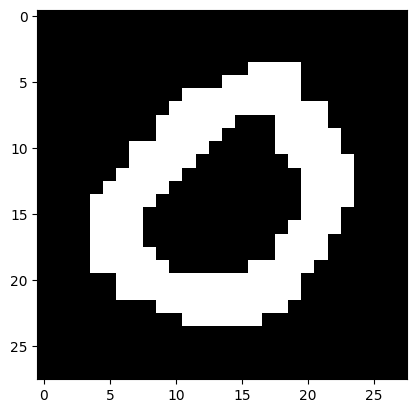

0.0


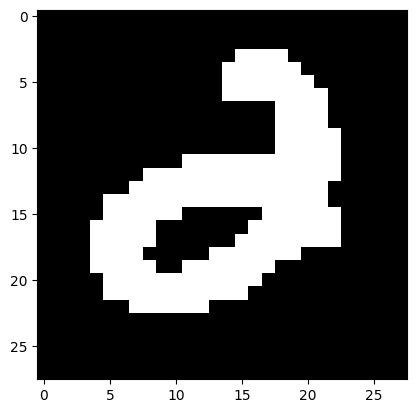

2.0


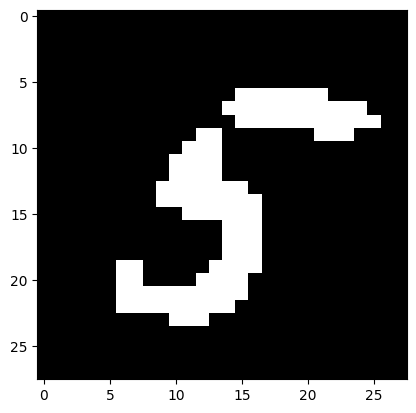

5.0


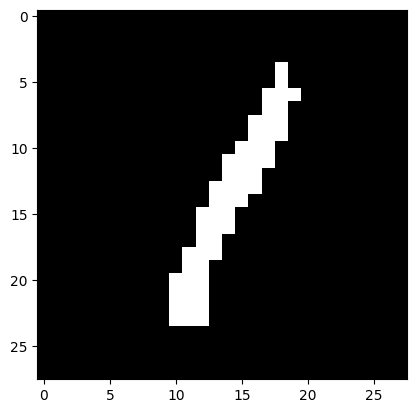

1.0


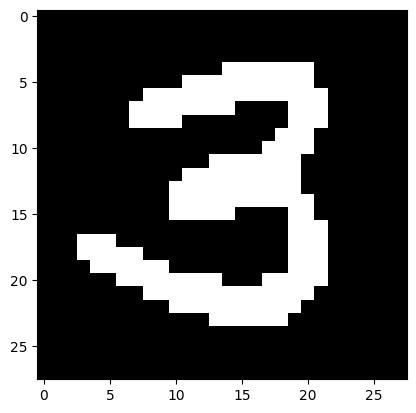

3.0


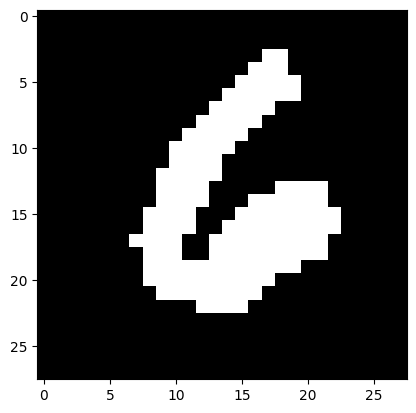

6.0


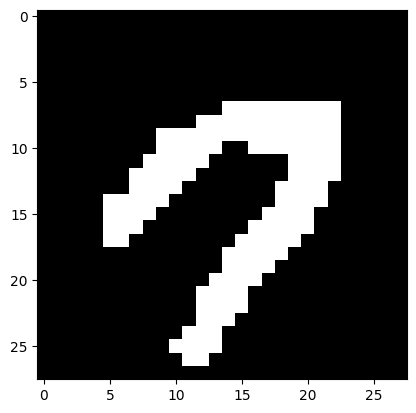

7.0


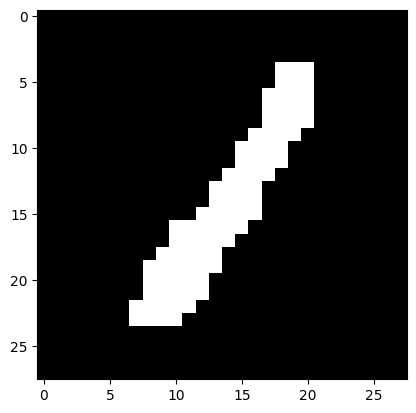

1.0


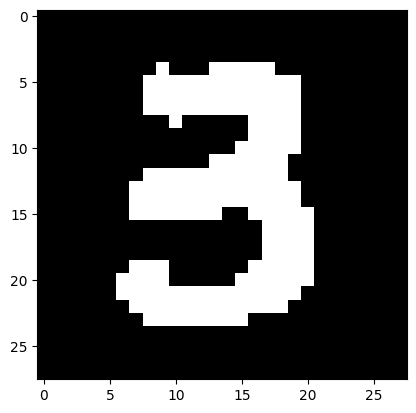

3.0


In [6]:
for test_number in [418, 778, 754, 124, 738, 466, 310, 398, 72]:
    data = np.reshape(m_x[test_number], (28, 28)).astype(int)  # 将 m_x 的第一个样本重新调整形状为 28x28 的二维数组，并转换为整数类型
    plt.figure()  # 创建新的绘图窗口
    plt.imshow(data, cmap='gray')  # 在绘图窗口中显示灰度图像
    plt.show()  # 添加此行以显示图像

    print(m_y[test_number])